<a href="https://colab.research.google.com/github/CodeChamp-SS/Digit-Recognition-using-KNN/blob/main/Digit_Recognition_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
test = pd.read_csv('/content/sample_data/test_mnist.csv')
train = pd.read_csv('/content/sample_data/train_mnist.csv')

In [16]:
print(train.shape)
print(test.shape)

(2287, 785)
(1000, 785)


In [19]:
train.head()
# print(train.columns)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# train = train.values
test = test.values
print(train.shape, test.shape)
print(type(train))

(2287, 785) (1000, 785)
<class 'numpy.ndarray'>


In [24]:
X_train = train[:,1:]
Y_train = train[:,0]
print(X_train.shape, Y_train.shape)

X_test = test[:,1:]
Y_test = test[:,0]
print(X_test.shape, Y_test.shape)

(2287, 784) (2287,)
(1000, 784) (1000,)


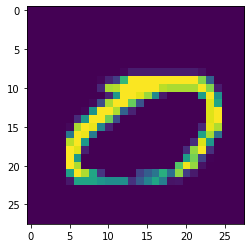

In [30]:
# visualizing some data
def draw(i):
  i = i.reshape((28, 28))
  plt.imshow(i)
  plt.show()

draw(X_train[0])

In [61]:
def dist(x1, x2):
  return np.sqrt(sum((x1 - x2)**2))

def knn(q, x = X_train, y = Y_train, k = 5):
  m = x.shape[0]
  a = []
  for i in range(m):
    d = dist(x[i], q)
    a.append((d, y[i]))
  
  a = sorted(a)
  # slicing `a` to have max size k
  a = a[:k]
  a = np.array(a)
  a = np.unique(a[:,1], return_counts=True)
  # print(a)

  mxIdx = a[1].argmax()
  return a[0][mxIdx]

In [64]:
res = knn(X_test[220])
print(int(res))

2


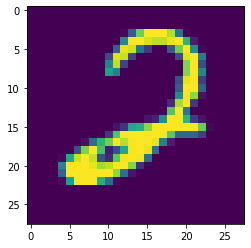

2


In [65]:
draw(X_test[220])
print(Y_test[220])

In [66]:
def accuracy():
  m = X_test.shape[0]
  cnt = 0
  for i in range(m):
    ans = int(knn(X_test[i]))
    cnt += (ans == Y_test[i])
  cnt /= m
  print(cnt)

accuracy()

0.491
